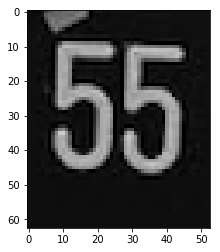

2


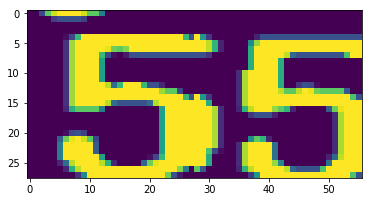

In [118]:
from skimage import io
import matplotlib.pyplot as plt
import cv2 
import time 

# jigo = time.time()
orig = cv2.imread("small_bboxes/0.png")

def preprocess_digits(roi):
    """
    Blurs and thresholds a color roi, returns list of image sections potentially containing digits
    as numpy arrays; reformatted to 28*28 for MNIST-style digit recognition
    """
    regions = []
    small = roi.copy()
    small = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    small = cv2.medianBlur(small,3)
    _, small = cv2.threshold(small,100, 255,cv2.THRESH_BINARY)
    cnts = cv2.findContours(small.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
    cnts = contours.sort_contours(refCnts, method="left-to-right")[0]
    for cn in cnts:
        # compute the bounding box of the contour and draw it on our
        # image
        (x, y, w, h) = cv2.boundingRect(cn)
        # check that the bounding box of the putative number takes up at least 5% of roi area:
        if w*h*1.0/(small.shape[0]*small.shape[1]) > 0.05:
            potential_digit = small.copy()[y-2:y+h+2, x-2:x+w+3]
            potential_digit = cv2.resize(potential_digit, (28,28))
            regions.append(potential_digit)
    return regions
"""
small = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
small = cv2.medianBlur(small,3)
print "meano:", np.mean(small)
ret, small = cv2.threshold(small,100, 255,cv2.THRESH_BINARY)

refCnts = cv2.findContours(small.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
refCnts = contours.sort_contours(refCnts, method="left-to-right")[0]
# loop over the (sorted) contours
for c in refCnts:
    # compute the bounding box of the contour and draw it on our
    # image
    (x, y, w, h) = cv2.boundingRect(c)
    # check that the bounding box of the putative number takes up at least 5% of roi area:
    if w*h*1.0/(small.shape[0]*small.shape[1]) > 0.05:
        # print x,y,w,h
        goran = small.copy()[y-3:y+h+3, x-3:x+w+3]
        goran_arnautovic = cv2.resize(goran, (28,28))
        io.imsave("small_bboxes/goran_arnautovic2.png", goran_arnautovic)
    break
        #print cv2.boundingRect(c)
        # cv2.rectangle(small, (x-3, y-3), (x + w +3, y + h+3), 255, 1)


"""    
plt.imshow(orig)
plt.show()
gimgom = preprocess_digits(orig)
print len(gimgom)
# plt.imshow(small)
plt.imshow(np.hstack(gimgom))
plt.show()
# wigo = time.time() - jigo
# print wigo